# SMS Spam Filtering

* We will use Natural Language Processing and Machine learning techniques to filter out spam and ham text messages.

* We'll be using a dataset from the [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)

* The file we are using contains a collection of more than 5 thousand SMS phone messages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
mess=open('SMSSpamCollection')

In [15]:
mess=[x.strip() for x in mess]

In [19]:
for i,j in enumerate(mess[:10]):
    print (i,j)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 1

In [20]:
print(len(mess))

5574


In [21]:
df=pd.read_csv('SMSSpamCollection',sep='\t',names=['Label','Message'])

In [22]:
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
df.groupby('Label').describe()

Message                                                               
        count unique                                                top freq
Label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
Label      5572 non-null object
Message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


* No null values

In [36]:
df['Length']=df['Message'].apply(len)

In [37]:
df.head()

,Label,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


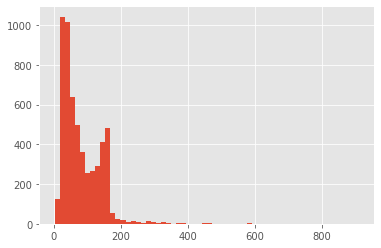

In [41]:
plt.style.use('ggplot')
df['Length'].hist(bins=60)

In [42]:
df.Length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: Length, dtype: float64

In [61]:
# just to check the longest message
df[df['Length']==910]['Message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020686774CC0>,
      dtype=object)

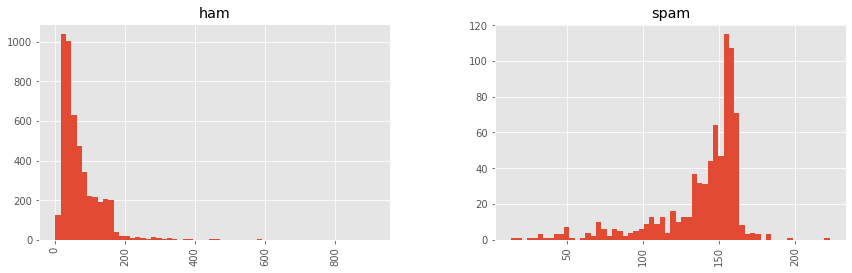

In [45]:
df.hist(by='Label',column='Length',bins=60,figsize=(14,4))

* Looks like length of a message is a good feature to segregate Spam from Ham

### Text Preprocessing

Our main issue with our data is that it is all in text format (strings). We will use the 'Bag-of-words' approach, where each unique word in a text will be represented by one number.


First removing punctuation. We can just take advantage of Python's built-in **string** library to get a quick list of all the possible punctuation:

In [49]:
from nltk.corpus import stopwords

In [50]:
stopwords.words('English')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [51]:
def text_process(mess):
    
    import string

    nopunc = [char for char in mess if char not in string.punctuation]

    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('English')]

In [53]:
vector=df['Message'].apply(text_process)

In [54]:
vector.head()

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

### Vectorization
Now we'll convert each message, represented as a list of tokens above, into a vector that machine learning models can understand.


We'll do that in three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

In [56]:
bow_transform=CountVectorizer(analyzer=text_process).fit(df['Message'])

In [58]:
print(len(bow_transform.vocabulary_))

11425


In [62]:
mess_transform=bow_transform.transform(df['Message'])

In [63]:
print('Shape of Sparse Matrix : ',mess_transform.shape)

Shape of Sparse Matrix :  (5572, 11425)


* This means there are 5572 text messages with 11425 unique words

Now we will calculate the TF-IDF weight which is a statistical measure used to evaluate how important a word is to the document

It is calculated by multiplying Term Frequency and Inverse Document Frequency

In [64]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer=TfidfTransformer().fit(mess_transform)

In [66]:
mess_ifidf=tfidf_transformer.transform(mess_transform)

In [67]:
print(mess_ifidf.shape)

(5572, 11425)


### Train the model

We will use Naive Bayes classifier algorithm

In [68]:
from sklearn.naive_bayes import MultinomialNB

In [71]:
spam_detect_model=MultinomialNB().fit(X=mess_ifidf,y=df['Label'])

In [72]:
all_predictions = spam_detect_model.predict(mess_ifidf)

In [73]:
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


* We will use sklearn classification report to see how well our model performed

In [74]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(df['Label'],all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



* Now we didn't split our model into training and testing and making predictions without it doesn't make any sense.
Hence, suing sklearn library for implementing it

In [79]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(df['Message'],df['Label'],test_size=0.3)

## Creating a Pipeline

Let's run our model again and then predict off the test set. We will use SciKit Learn's [pipeline] capabilities to store a pipeline of workflow. This will allow us to set up all the transformations that we will do to the data for future use.

In [82]:
from sklearn.pipeline import Pipeline

In [83]:
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])

In [84]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002068FDA5BF8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [91]:
predictions=pipeline.predict(X_test)